In [8]:
import bif_parser
import prettytable
import pydotplus
from bayesian.bbn import *
from IPython.core.display import display, Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Import the required libraries.

In [9]:
def show_graphgiz_image(graphviz_data,name):
    graph = pydotplus.graph_from_dot_data(graphviz_data)
    graph.write_png(name)
    img=mpimg.imread(name)
    plt.figure(figsize=(20,10))
    imgplot = plt.imshow(img)
    plt.show()

A function to display the image using graphviz

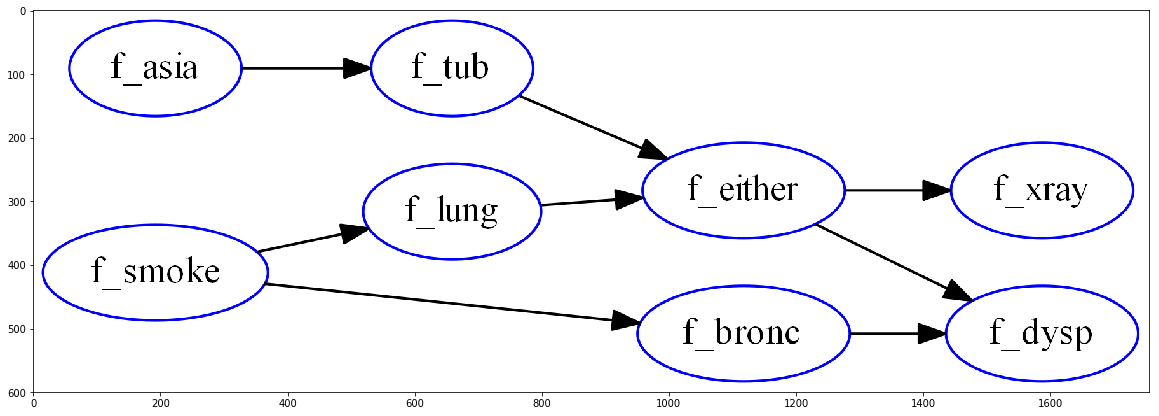

In [10]:
name = 'asia'
module_name = bif_parser.parse(name)
module = __import__(module_name)
bg = module.create_bbn()

#Initialization
s0 = bg.get_graphviz_source()
show_graphgiz_image(s0,"Bayes_py2.png")

The .bif file contains all the dependencies of nodes as shown in the above graph.

Select the .bif file named asia from the current working directory.
<br><br>Create a Bayesian Belief Network using create_bbn
<br><br>Save the graph after getting it from the created Bayes model.

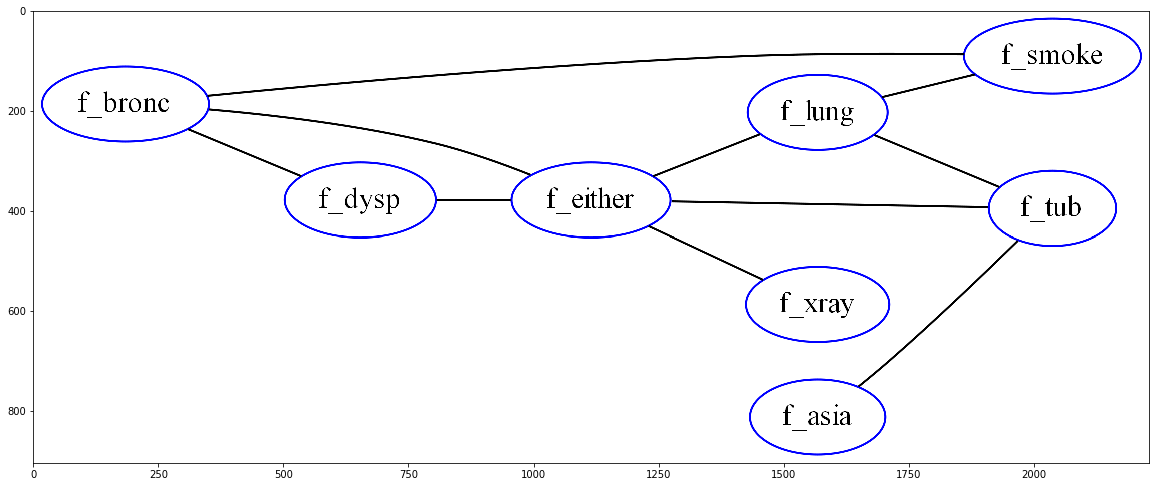

In [11]:
# Moralization
gu = make_undirected_copy(bg)
m1 = make_moralized_copy(gu, bg)
s1 = m1.get_graphviz_source()
show_graphgiz_image(s1,'Moralized_py2.png')

Draw the moralized graph.

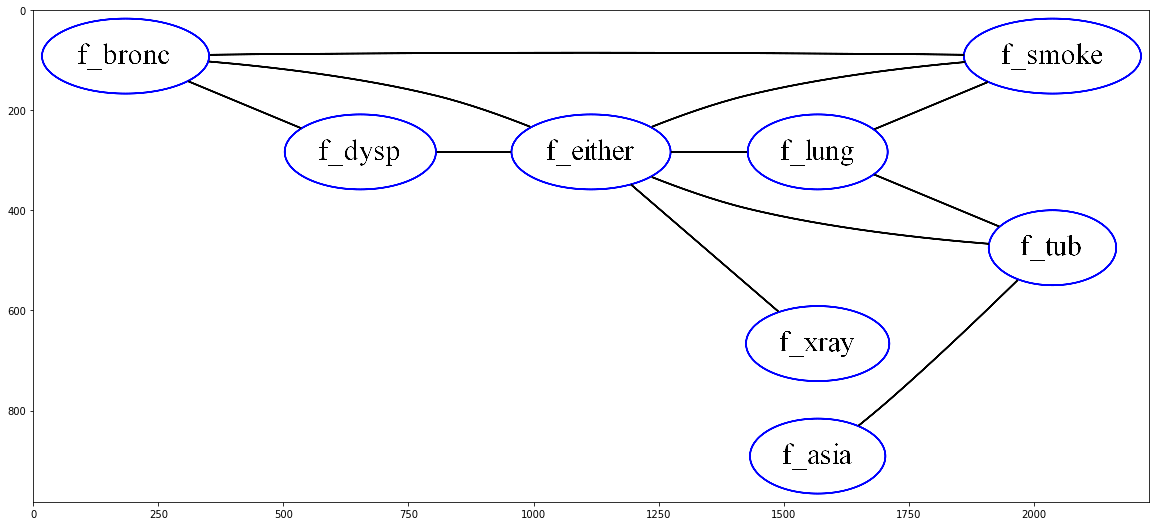

In [12]:
# Triangulation
cliques, elimination_ordering = triangulate(m1, priority_func)
s2 = m1.get_graphviz_source()
show_graphgiz_image(s2,'Triangulated_py2.png')



Draw the triangulated graph

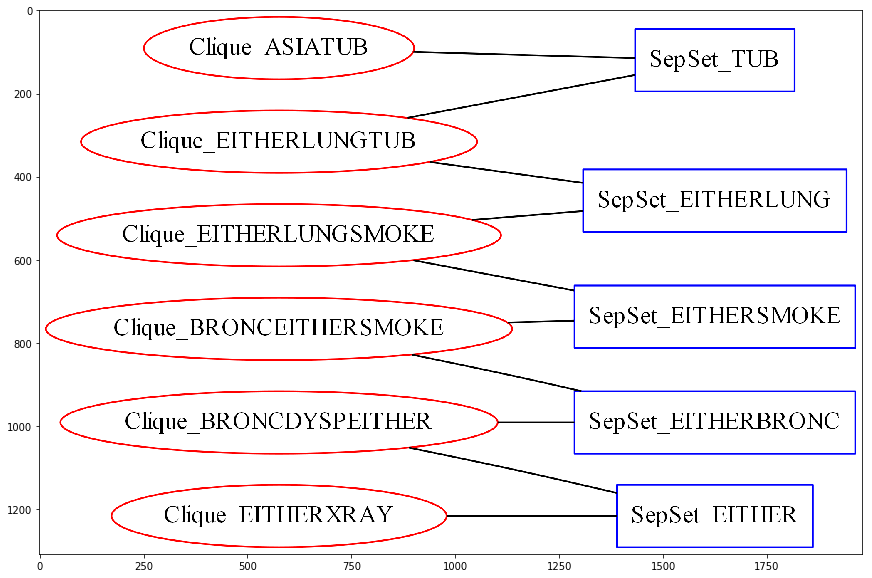

In [13]:
# Building the junction tree
jt = bg.build_join_tree()
s3 = jt.get_graphviz_source()
show_graphgiz_image(s3,'Junction_tree_py2.png')


Draw the junction tree

# Running Intersection Property

1) Consider two clusters in the in the junction tree.If these two clusters have a common node, the Running Intersection Property is said to be satisfied if the common node is included in all clusters between the two clusters.
<br><br>2) In our junction tree, we see that this condition is satisfied.
<br><br>3) Ex.  For the clusters {BRONCH,DYSP,EITHER} , {EITHER,LUNG,TUB} .'Either' is present in both clusters. The fact that 'Either' is present in the all clusters between them Running Intersection Property is true for these clusters.
<br><br>4) It can be seen that the above is true for all the other nodes of our junction tree as well. Therefore, the junction tree satisfies the running intersection property.

# Potential Distribution

Looking at the above junction tree, we see that the node clusters are :-

$\{A,T\} \{E,L,T\} \{E,X\} \{E,L,S\} \{B,E,S\} \{B,D,E\}$

The above clusters are in order of how they appear in the junction tree.

We have the following equation representing the distribution:-

$p(V ) = p(a)p(t | a)p(s)p(l | s)p(b | s)p(e | t, l)p(d | e, b)p(x | e)$

We split the above equation into the following potentials:-<br>

$\Psi(a,t) = p(a)p(t | a)$<br><br>
$\Psi(l,s) = p(s)p(l | s)$<br><br>
$\Psi(b,s) = p(b | s)$<br><br>
$\Psi(e,l,t) = p(e | t, l)$<br><br>
$\Psi(b,d,e) = p(d | e, b)$<br><br>
$\Psi(e,x) = p(x | e)$<br><br>

We distribute the above Psi values to the clusters in the following way:-<br><br>
$\Psi(e,x) \in \{E,X\}$<br><br>
$\Psi(a,t) \in \{A,T\}$<br><br>
$\Psi(l,s) \in \{E,L,S\}$<br><br>
$\Psi(b,s) \in \{B,E,S\}$<br><br>
$\Psi(e,l,t) \in \{E,L,T\}$<br><br>
$\Psi(b,d,e) \in \{B,D,E\}$<br><br>

Note: The {E,L,S} and {B,E,S} clusters have E to maintain the running intersection property.

So we can write the following.

$P = \Psi(a,t)\Psi(e,l,t)\Psi(l,s)\Psi(b,s)\Psi(b,d,e)\Psi(e,x)$

In [6]:
# Initializing Potentials
assignments = jt.assign_clusters(bg)
jt.initialize_potentials(assignments, bg)

# Message Passing
jt.propagate()
#jt.propagate().write_png('sdfadsa.png')
#show_graphgiz_image(ss,'Moralized.png')
# Query with Evidences
#jt.query(bronc='yes')

bronc_clust = [i for i in jt.clique_nodes for v in i.variable_names if v =='bronc']
pot = bronc_clust[0].potential_tt

In [7]:
# A function to return the sum for a specific assignment, such as 'bronc,yes'
sum_assignments =lambda imap, tup: sum([v for k, v in imap.iteritems() for i in k if i == tup])
for i in pot:
    print i

# Get the sum for bronc=yes and bronc=no
yes, no =[sum_assignments(pot, ('bronc', i)) for i in ['yes', 'no']]
print('bronc: yes ', yes/float(yes+no), "no", no/float(yes+no))

(('bronc', 'yes'), ('dysp', 'yes'), ('either', 'no'))
(('bronc', 'no'), ('dysp', 'yes'), ('either', 'no'))
(('bronc', 'yes'), ('dysp', 'no'), ('either', 'yes'))
(('bronc', 'no'), ('dysp', 'no'), ('either', 'yes'))
(('bronc', 'no'), ('dysp', 'no'), ('either', 'no'))
(('bronc', 'yes'), ('dysp', 'no'), ('either', 'no'))
(('bronc', 'no'), ('dysp', 'yes'), ('either', 'yes'))
(('bronc', 'yes'), ('dysp', 'yes'), ('either', 'yes'))
('bronc: yes ', 0.45, 'no', 0.55)
